In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold

In [78]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

In [69]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [7]:
healthy_m=pd.read_csv("healthy_test.csv") 

In [8]:
healthy_m.head(3)

,age,gender,bmi_corrected,blood_pressure,heart_rate,cholesterol,glucose,sleep_hours,sleep_quality,work_hours,...,exercise_type,device_usage,healthcare_access,insurance,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,target
0,56,Male,18.989117,118.264254,60.749825,214.580523,103.008176,6.475885,Fair,7.671313,...,Strength,High,Poor,No,High,5,Moderate,No,Yes,healthy
1,69,Female,36.511417,117.917986,66.463696,115.794002,116.905134,8.428410,Good,9.515198,...,Cardio,Moderate,Moderate,No,High,5,High,Yes,No,healthy
2,46,Male,25.587429,123.073698,76.043212,138.134787,89.180302,5.702164,Poor,5.829853,...,Cardio,High,Good,Yes,High,4,Moderate,No,No,healthy


In [9]:
healthy_m.dtypes


age                        int64
gender                    object
bmi_corrected            float64
blood_pressure           float64
heart_rate               float64
cholesterol              float64
glucose                  float64
sleep_hours              float64
sleep_quality             object
work_hours               float64
physical_activity        float64
daily_steps              float64
alcohol_consumption       object
smoking_level             object
water_intake             float64
screen_time              float64
stress_level               int64
mental_health_score        int64
mental_health_support     object
education_level           object
job_type                  object
occupation                object
income                   float64
diet_type                 object
exercise_type             object
device_usage              object
healthcare_access         object
insurance                 object
sunlight_exposure         object
meals_per_day              int64
caffeine_i

In [10]:
healthy_m['exercise_type'] = healthy_m['exercise_type'].replace(np.nan, 'None')

In [11]:
object_cols = healthy_m.select_dtypes(include=['object']).columns
print(object_cols)

Index(['gender', 'sleep_quality', 'alcohol_consumption', 'smoking_level',
       'mental_health_support', 'education_level', 'job_type', 'occupation',
       'diet_type', 'exercise_type', 'device_usage', 'healthcare_access',
       'insurance', 'sunlight_exposure', 'caffeine_intake', 'family_history',
       'pet_owner', 'target'],
      dtype='object')


In [12]:
encoder = {'Yes': 1, 'No': 0,'Male':1,'Female':0,'healthy':1,'diseased':0,'Strength':1,'Cardio':2,'Mixed':3,'None':0}
columns_to_encode = ['sleep_quality', 'healthcare_access', 'device_usage', 'caffeine_intake', 'alcohol_consumption','smoking_level','sunlight_exposure','education_level','job_type','occupation','diet_type']
healthy_m.loc[:, columns_to_encode] = healthy_m.loc[:, columns_to_encode].apply(LabelEncoder().fit_transform)

encoder_2={'Strength':1,'Cardio':2,'Mixed':3,'None':0}

In [13]:
healthy_m.head(3)

,age,gender,bmi_corrected,blood_pressure,heart_rate,cholesterol,glucose,sleep_hours,sleep_quality,work_hours,...,exercise_type,device_usage,healthcare_access,insurance,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,target
0,56,Male,18.989117,118.264254,60.749825,214.580523,103.008176,6.475885,1,7.671313,...,Strength,0,2,No,0,5,1,No,Yes,healthy
1,69,Female,36.511417,117.917986,66.463696,115.794002,116.905134,8.428410,2,9.515198,...,Cardio,2,1,No,0,5,0,Yes,No,healthy
2,46,Male,25.587429,123.073698,76.043212,138.134787,89.180302,5.702164,3,5.829853,...,Cardio,0,0,Yes,0,4,1,No,No,healthy


In [14]:
for col in object_cols:
    unique_vals = healthy_m[col].unique().astype(str).tolist()
    if set(unique_vals).issubset(encoder.keys()):
        healthy_m[col] = healthy_m[col].map(encoder).astype(int)

In [15]:
healthy_m.head(3)

,age,gender,bmi_corrected,blood_pressure,heart_rate,cholesterol,glucose,sleep_hours,sleep_quality,work_hours,...,exercise_type,device_usage,healthcare_access,insurance,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,target
0,56,1,18.989117,118.264254,60.749825,214.580523,103.008176,6.475885,1,7.671313,...,1,0,2,0,0,5,1,0,1,1
1,69,0,36.511417,117.917986,66.463696,115.794002,116.905134,8.428410,2,9.515198,...,2,2,1,0,0,5,0,1,0,1
2,46,1,25.587429,123.073698,76.043212,138.134787,89.180302,5.702164,3,5.829853,...,2,0,0,1,0,4,1,0,0,1


In [16]:
for col in healthy_m.select_dtypes(include=['object']).columns:
    healthy_m[col] = healthy_m[col].astype('int')

In [17]:
healthy_m.dtypes

age                        int64
gender                     int64
bmi_corrected            float64
blood_pressure           float64
heart_rate               float64
cholesterol              float64
glucose                  float64
sleep_hours              float64
sleep_quality              int64
work_hours               float64
physical_activity        float64
daily_steps              float64
alcohol_consumption        int64
smoking_level              int64
water_intake             float64
screen_time              float64
stress_level               int64
mental_health_score        int64
mental_health_support      int64
education_level            int64
job_type                   int64
occupation                 int64
income                   float64
diet_type                  int64
exercise_type              int64
device_usage               int64
healthcare_access          int64
insurance                  int64
sunlight_exposure          int64
meals_per_day              int64
caffeine_i

In [18]:
target_column = "target"
X = healthy_m.drop('target', axis=1)
y = healthy_m[target_column]
X.head(3)

,age,gender,bmi_corrected,blood_pressure,heart_rate,cholesterol,glucose,sleep_hours,sleep_quality,work_hours,...,diet_type,exercise_type,device_usage,healthcare_access,insurance,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner
0,56,1,18.989117,118.264254,60.749825,214.580523,103.008176,6.475885,1,7.671313,...,2,1,0,2,0,0,5,1,0,1
1,69,0,36.511417,117.917986,66.463696,115.794002,116.905134,8.428410,2,9.515198,...,2,2,2,1,0,0,5,0,1,0
2,46,1,25.587429,123.073698,76.043212,138.134787,89.180302,5.702164,3,5.829853,...,2,2,0,0,1,0,4,1,0,0


In [19]:
feature_names = X.columns

In [20]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 70% training and 30% test

In [52]:
clf = DecisionTreeClassifier(max_depth=3,random_state=1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [53]:
y_pred_clf = clf.predict(X_test)

In [54]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_clf))

Accuracy: 0.70675


In [55]:
print("F 1 score:",metrics.f1_score(y_test, y_pred_clf))

F 1 score: 0.8281620813922826


In [100]:
print("Precision:",metrics.precision_score(y_test, y_pred_clf))

Precision: 0.7067560134020103


In [91]:
classification_rep_clf = classification_report(y_test, y_pred_clf)

In [93]:
print(classification_rep_clf)

              precision    recall  f1-score   support

           0       0.67      0.00      0.00      5866
           1       0.71      1.00      0.83     14134

    accuracy                           0.71     20000
   macro avg       0.69      0.50      0.41     20000
weighted avg       0.69      0.71      0.59     20000



         Feature  Importance
9     work_hours    0.342441
2  bmi_corrected    0.296788
7    sleep_hours    0.162889
5    cholesterol    0.126504
6        glucose    0.071378


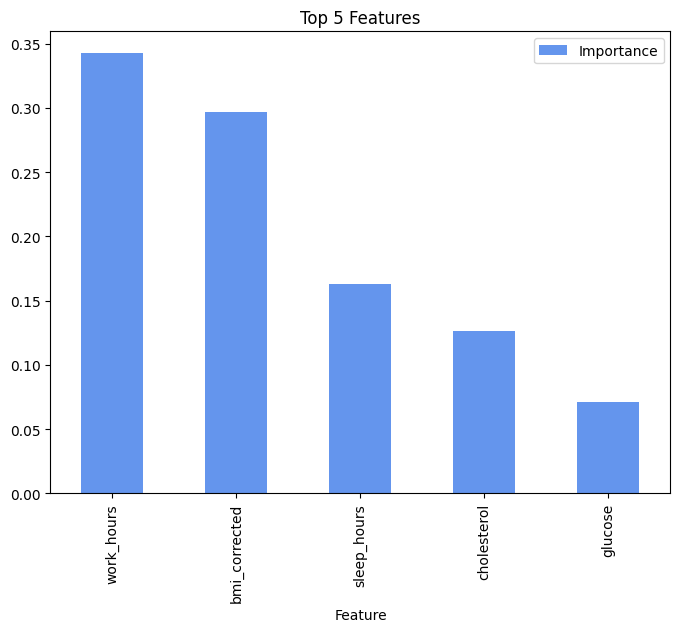

In [56]:
feature_importances = clf.feature_importances_
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(5)
print(importance_df)
importance_df.plot.bar(x='Feature',figsize=(8,6),color='cornflowerblue')
plt.title("Top 5 Features")
plt.savefig("decision_tree_feature.png")

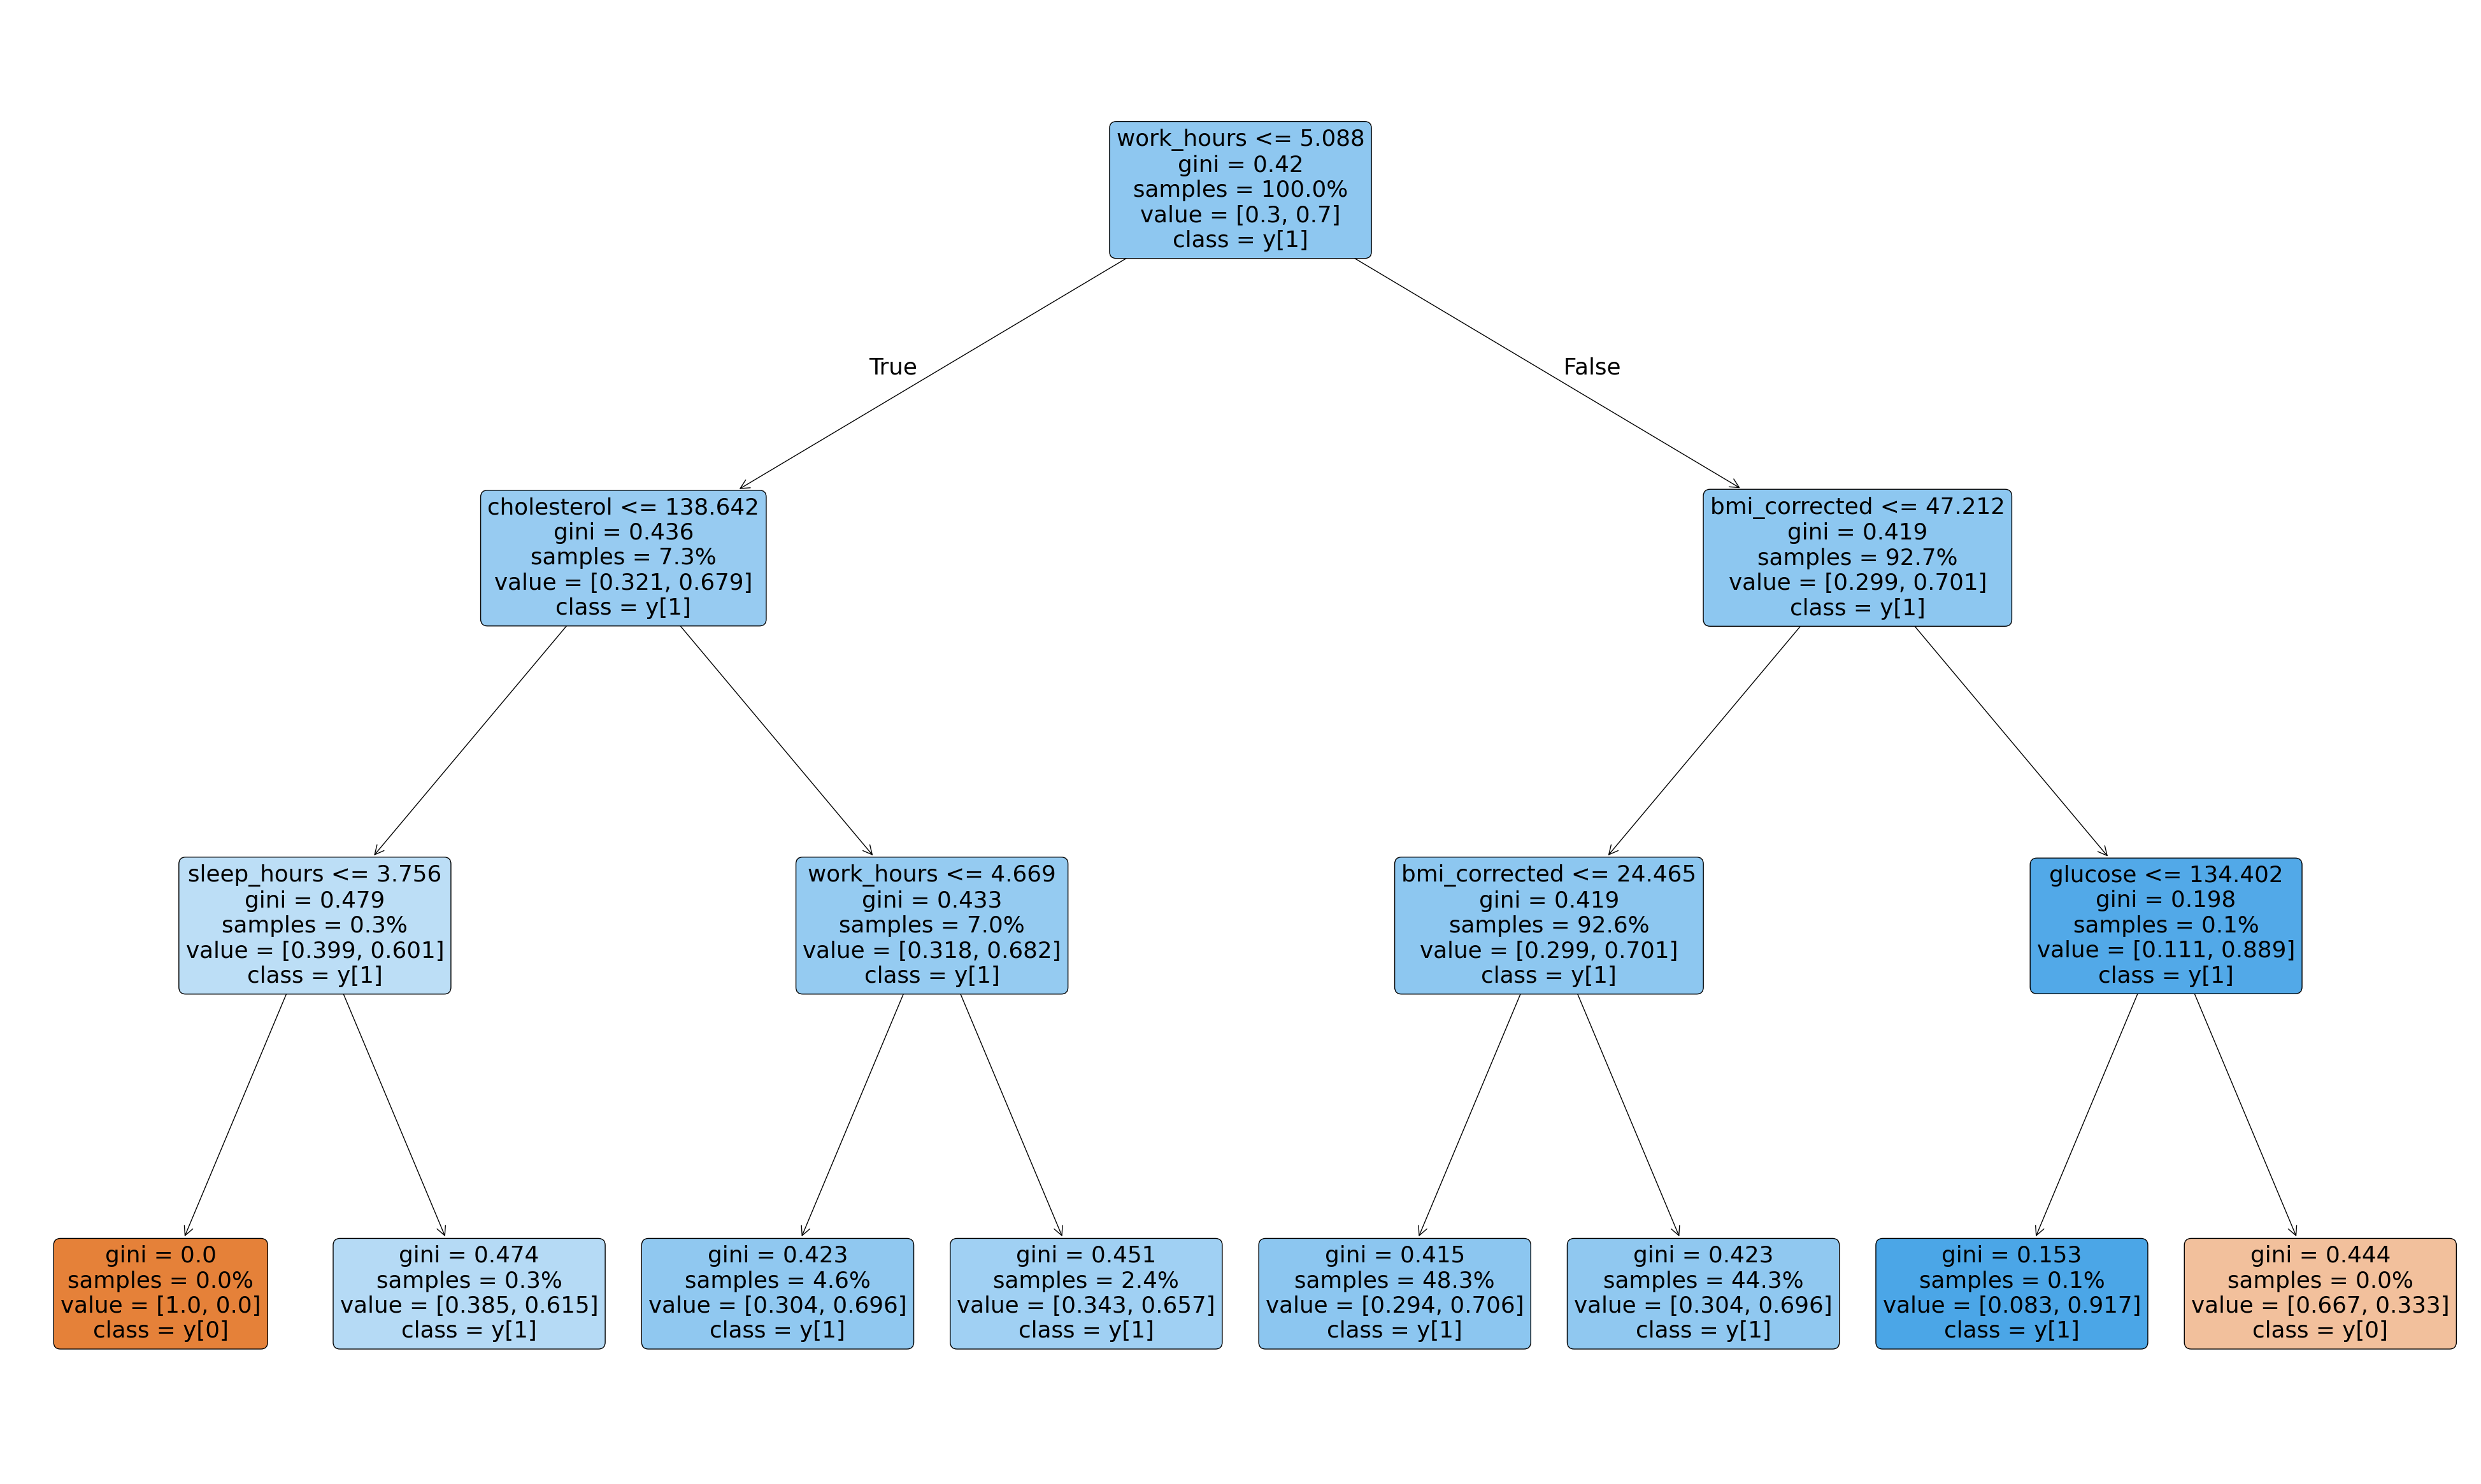

In [57]:
plt.figure(figsize=(50, 30))
plot_tree(clf,class_names=True,
          feature_names=feature_names,
         proportion=True,
         rounded=True,filled=True
)
plt.savefig("decision_tree.png")
plt.show()

In [59]:
rf_classifier = RandomForestClassifier(max_depth=3,random_state=1)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=1)

In [60]:
y_pred_rf = rf_classifier.predict(X_test)


In [61]:
print("f1:",metrics.f1_score(y_test, y_pred_rf))

f1: 0.8281478877365677


In [62]:
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of the Random Forest Classifier: {accuracy:.4f}")

Accuracy of the Random Forest Classifier: 0.7067


In [97]:
classification_rep_rf= classification_report(y_test, y_pred_rf)
print(classification_rep_rf)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5866
           1       0.71      1.00      0.83     14134

    accuracy                           0.71     20000
   macro avg       0.35      0.50      0.41     20000
weighted avg       0.50      0.71      0.59     20000



/opt/anaconda3/envs/evalenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/evalenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/evalenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


          Feature  Importance
9      work_hours    0.104114
5     cholesterol    0.094119
2   bmi_corrected    0.082452
4      heart_rate    0.082054
22         income    0.076297


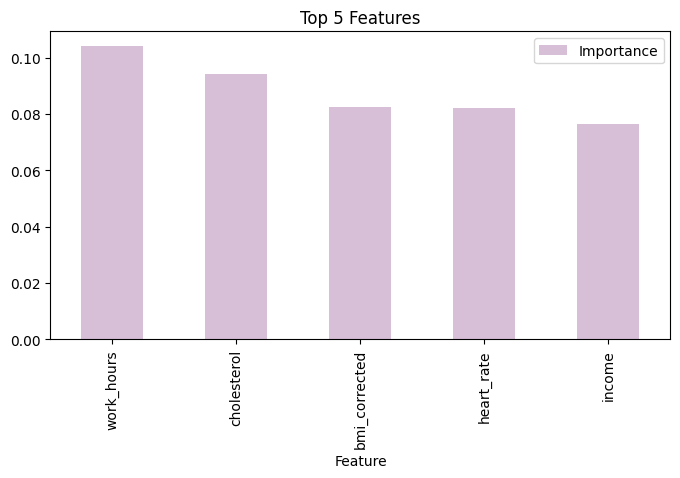

In [63]:
feature_importances = rf_classifier.feature_importances_
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(5)
print(importance_df)
importance_df.plot(x='Feature',kind='bar', figsize=(8,4),color='thistle')
plt.title("Top 5 Features")
plt.savefig("rf_feature.png")

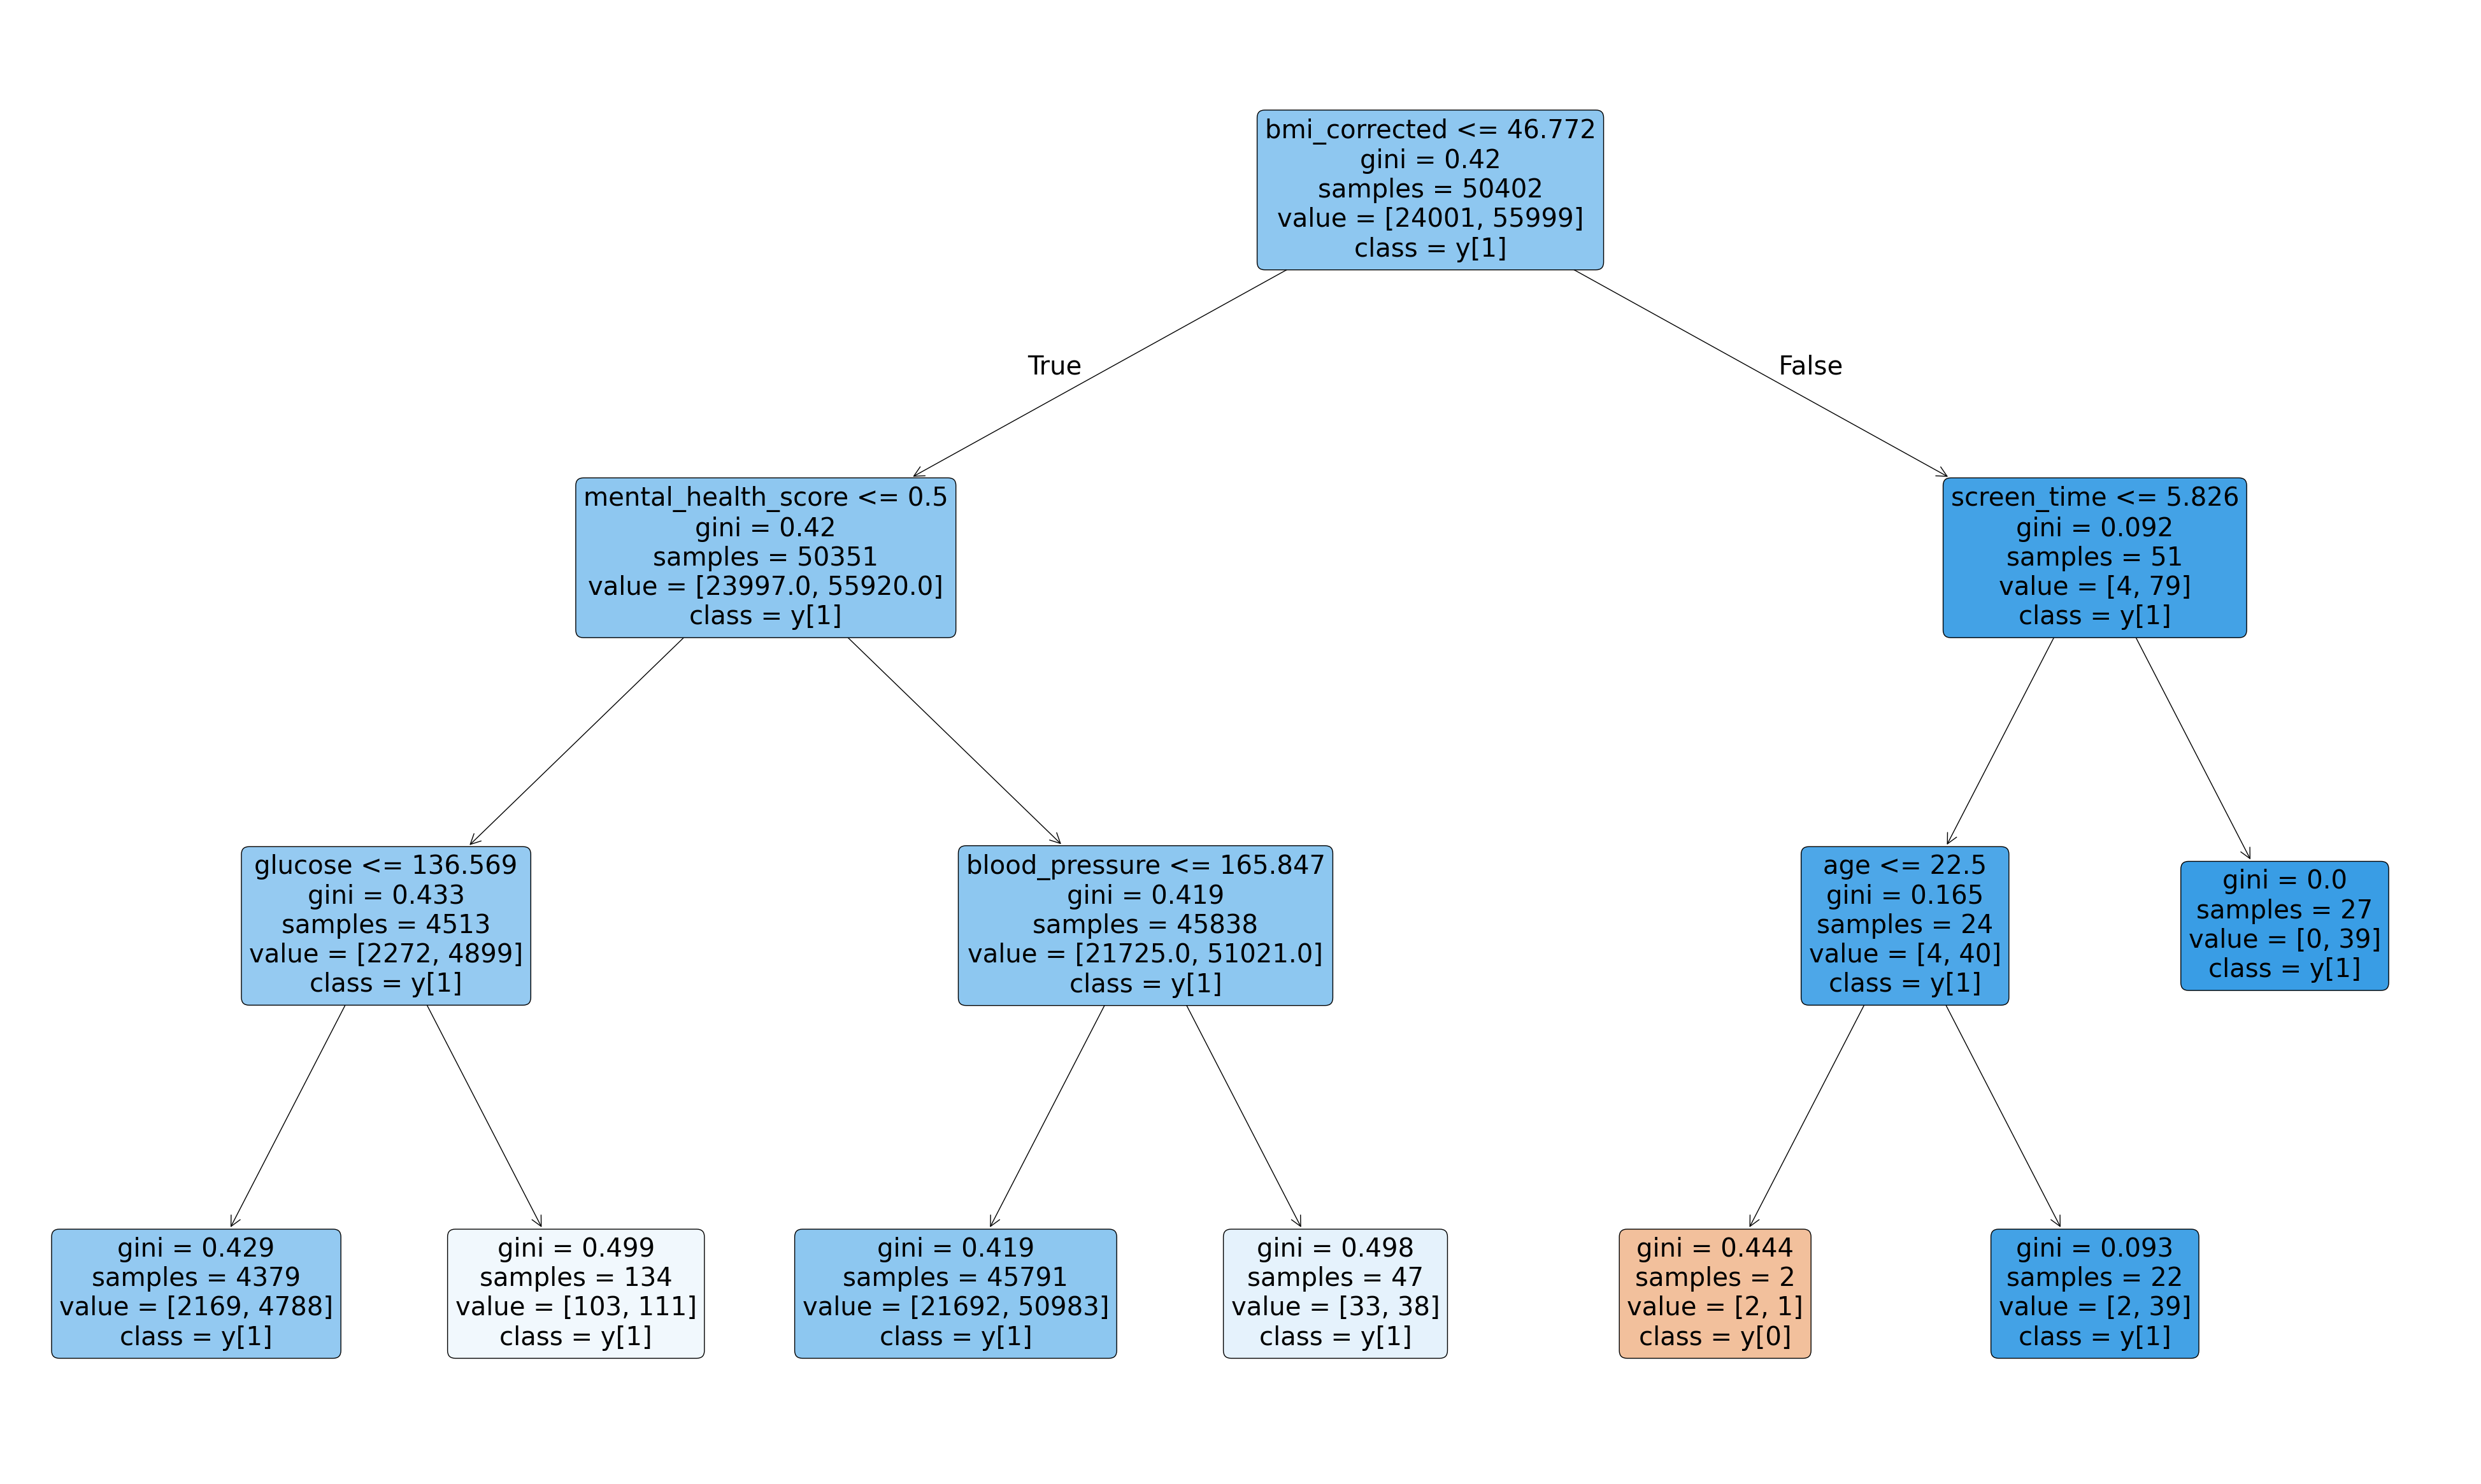

In [64]:
rftree = rf_classifier.estimators_[0]
plt.figure(figsize=(50, 30))
plot_tree(rftree, 
          feature_names=feature_names, 
          class_names=True, 
          filled=True,              
          rounded=True)   
plt.savefig("Random Forest.png")
plt.show()

In [83]:
gb_classifier = GradientBoostingClassifier()
#gb_classifier.fit(X_train, y_train)
#accuracy = gb_classifier.score(X_test, y_test)
#print(f"Accuracy: {accuracy:.4f}")

In [87]:
param_distributions = {
    'n_estimators': np.arange(30, 60, 100),
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [88]:
random_search = RandomizedSearchCV(
    estimator=gb_classifier,
    param_distributions=param_distributions,
    scoring='accuracy',
    cv=5,  
    verbose=2,
    random_state=1
)

In [89]:
random_search.fit(X_train, y_train)

/opt/anaconda3/envs/evalenv/lib/python3.9/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 27 is smaller than n_iter=50. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   8.3s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   8.2s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   8.2s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   8.2s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   8.2s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=30; total time=   8.2s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=30; total time=   8.2s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=30; total time=   8.2s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=30; total time=   7.9s
[CV] END max_depth=3, min_samples_leaf=1, min_s

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=50,
                   param_distributions={'max_depth': [3, 5, 10],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([30])},
                   random_state=1, scoring='accuracy', verbose=2)

In [90]:
print("Best Parameters:", random_search.best_params_)
best_model = random_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Test Set Accuracy:", accuracy)

Best Parameters: {'n_estimators': 30, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 3}
Test Set Accuracy: 0.7065


In [96]:
y_pred_gb = best_model.predict(X_test)
classification_rep_gb = classification_report(y_test, y_pred_gb)
print(classification_rep_gb)

              precision    recall  f1-score   support

           0       0.17      0.00      0.00      5866
           1       0.71      1.00      0.83     14134

    accuracy                           0.71     20000
   macro avg       0.44      0.50      0.41     20000
weighted avg       0.55      0.71      0.59     20000



In [66]:
# Perform K-Fold Cross-Validation
# cv=5 means 5-fold cross-validation
scores = cross_val_score(gb_classifier, X_test, y_test, cv=5, scoring='accuracy')

In [67]:
print(f"Mean accuracy: {scores.mean():.2f}")

Mean accuracy: 0.71


              Feature  Importance
9          work_hours    0.130735
2       bmi_corrected    0.112586
4          heart_rate    0.104490
15        screen_time    0.084252
10  physical_activity    0.081538


Text(0.5, 1.0, 'Top 5 Features')

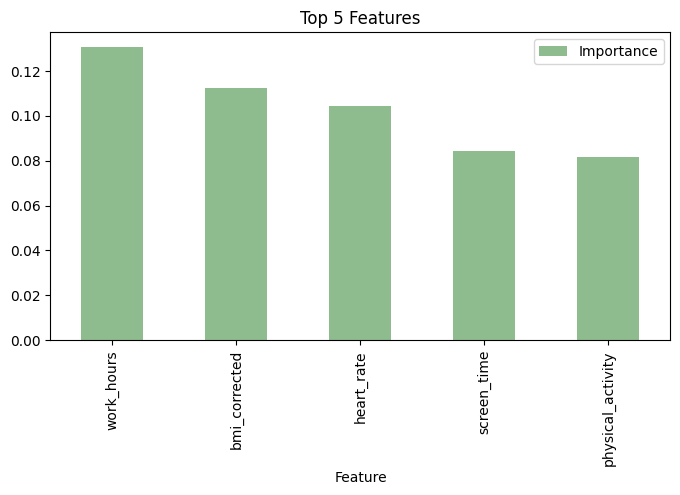

In [103]:
feature_importances = best_model.feature_importances_
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(5)
print(importance_df)
importance_df.plot.bar(x='Feature',figsize=(8,4),color='darkseagreen')
plt.title("Top 5 Features")